# wallet transaction analysis


## 1-generate private key 

### Private Key Formats
Private keys are what are used to unlock satoshis from a particular address. In Bitcoin, a private key in standard format is simply a 256-bit number, between the values:
0x01 and 0xFFFF FFFF FFFF FFFF FFFF FFFF FFFF FFFE BAAE DCE6 AF48 A03B BFD2 5E8C D036 4140, representing nearly the entire range of 2256-1 values. The range is governed by the secp256k1 ECDSA encryption standard used by Bitcoin.

we have many way to show it . like : hex format - wif format (wallet import format)-binary format - ...
###### example
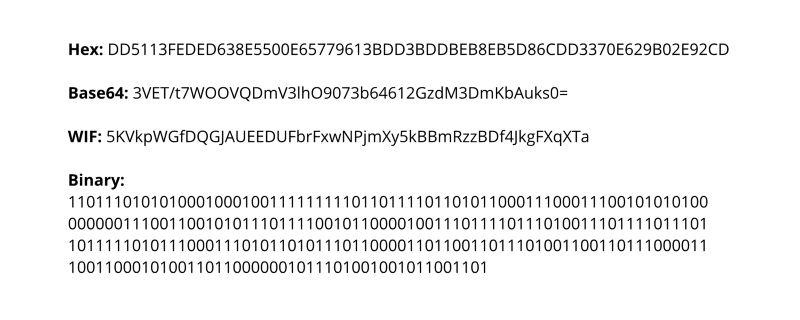
every binary string that have 256 length and in the range of secp256k1 can be bitcoin private key
##### in below block i'll create private key 

In [127]:
import secrets
binary_format = secrets.randbits(256)
print (bin(binary_format)[2:])
print ("\nintiger :",binary_format)

1000111101010111011110010010110100000101100111110011011101100111011100100010101000001001001011110101110101001100011101000111100000100001000001100010110011010000101111010000000001100100011000011001011001000010001101111001100110000000010000100000001101000101

intiger : 64835289367140433949485687122052077765755275131959455991755533919526571868997


In [128]:
hex_format = hex(binary_format)
print(hex_format)

0x8f57792d059f3767722a092f5d4c747821062cd0bd0064619642379980420345


In [129]:
private_key = hex_format[2:]
print(private_key)

8f57792d059f3767722a092f5d4c747821062cd0bd0064619642379980420345


## 2- generate public key and address


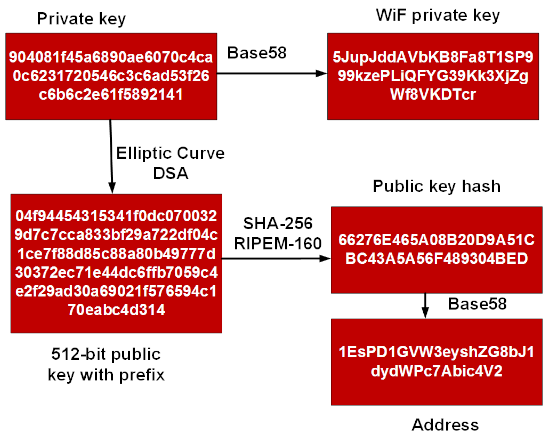

### 2.1- public key
The public key is calculated from the private key using elliptic curve multiplication, which is irreversible: K = k * G, where k is the private key, G is a constant point called the generator point, and K is the resulting public key. The reverse operation, known as “finding the discrete logarithm”—calculating k if you know K—is as difficult as trying all possible values of k, i.e., a brute-force search. Before we demonstrate how to generate a public key from a private key.
#### we have 2 kind of public key :
#### a- uncompressed public key
#### b- compressed public key
#### https://learnmeabitcoin.com/guide/public-key

In [130]:
import codecs
import hashlib
import ecdsa
def private_to_public(private_key):
        private_key_bytes = codecs.decode(private_key,'hex')
        # Get ECDSA public key
        key = ecdsa.SigningKey.from_string(private_key_bytes, curve=ecdsa.SECP256k1).verifying_key
        key_bytes = key.to_string()
        key_hex = codecs.encode(key_bytes,'hex')
        # Add bitcoin byte
        bitcoin_byte = b'04'
        public_key = bitcoin_byte + key_hex
        return public_key

public_key = private_to_public(private_key)
print("uncompressed public key (512 bit) : ",public_key)

uncompressed public key (512 bit) :  b'045ae44869b778d3795ce9a3ec20cc90faee14acd3b243306709c856b636b6eee8efa8fdea741e1c453e7a3bf2d9a3c405693a5502d1ca9c85e4ae7f18b097fa29'


In [131]:
def private_to_compressed_public(private_key):
        private_hex = codecs.decode(private_key, 'hex')
        # Get ECDSA public key
        key = ecdsa.SigningKey.from_string(private_hex, curve=ecdsa.SECP256k1).verifying_key
        key_bytes = key.to_string()
        key_hex = codecs.encode(key_bytes, 'hex')
        # Get X from the key (first half)
        key_string = key_hex.decode('utf-8')
        half_len = len(key_hex) // 2
        key_half = key_hex[:half_len]
        # Add bitcoin byte: 0x02 if the last digit is even, 0x03 if the last digit is odd
        last_byte = int(key_string[-1], 16)
        bitcoin_byte = b'02' if last_byte % 2 == 0 else b'03'
        public_key = bitcoin_byte + key_half
        return public_key

public_key_compressed = private_to_compressed_public(private_key)
print("compressed public key : ",public_key_compressed)

compressed public key :  b'035ae44869b778d3795ce9a3ec20cc90faee14acd3b243306709c856b636b6eee8'


بحث پابلیک کی های فشرده و غیر فشرده به معادله خم بیضوی یاهمون سیستم رمز نگاری بیت کوین برمی گرده

y² = x³+ax+b

The elliptic curve used by Bitcoin, Ethereum, and many other cryptocurrencies is called secp256k1. The equation for the secp256k1 curve is y² = x³+7.

توی آدرس های غیر فشرده نقطه مورد نظر رو پیدا میکنن و جواب هاش که همون ایکس و ایگرگ هستن رو کنار هم میزارن تا تبدیل بشه پابلیک کی غیر فشرده ولی تو پابلیک کی های فشرده فقط از ایکس استفاده میکنن به علاوه یه بایت که نشانه زوج یا فرد بودن ایگرگ هستش همون چیزی که تو خط 13 کد بالا داره چک میشه 

### 2.2- address

:عکس زیر کامل ترین اینوگرافیک برای آدرس ها دیدم.توی بیت کوین در کل سه نوع آدرس داریم

### 1- p2pkh(pay to public key hash) (start with : 1)(in testnet : n/m)
### 2- p2sh (pay to script hash)(bip 16) ( start with : 3 )( in testnet : 2 )
### 3- Bech 32 ( Bech32 is a segwit address format ) (start with : bc1 )(in testnet : tb )

فعلا من فقط با آدرس های نوع اول ادامه میدم ولی تو ویرایش های بعدی بقیه آدرس ها رو هم اضافه میکنم


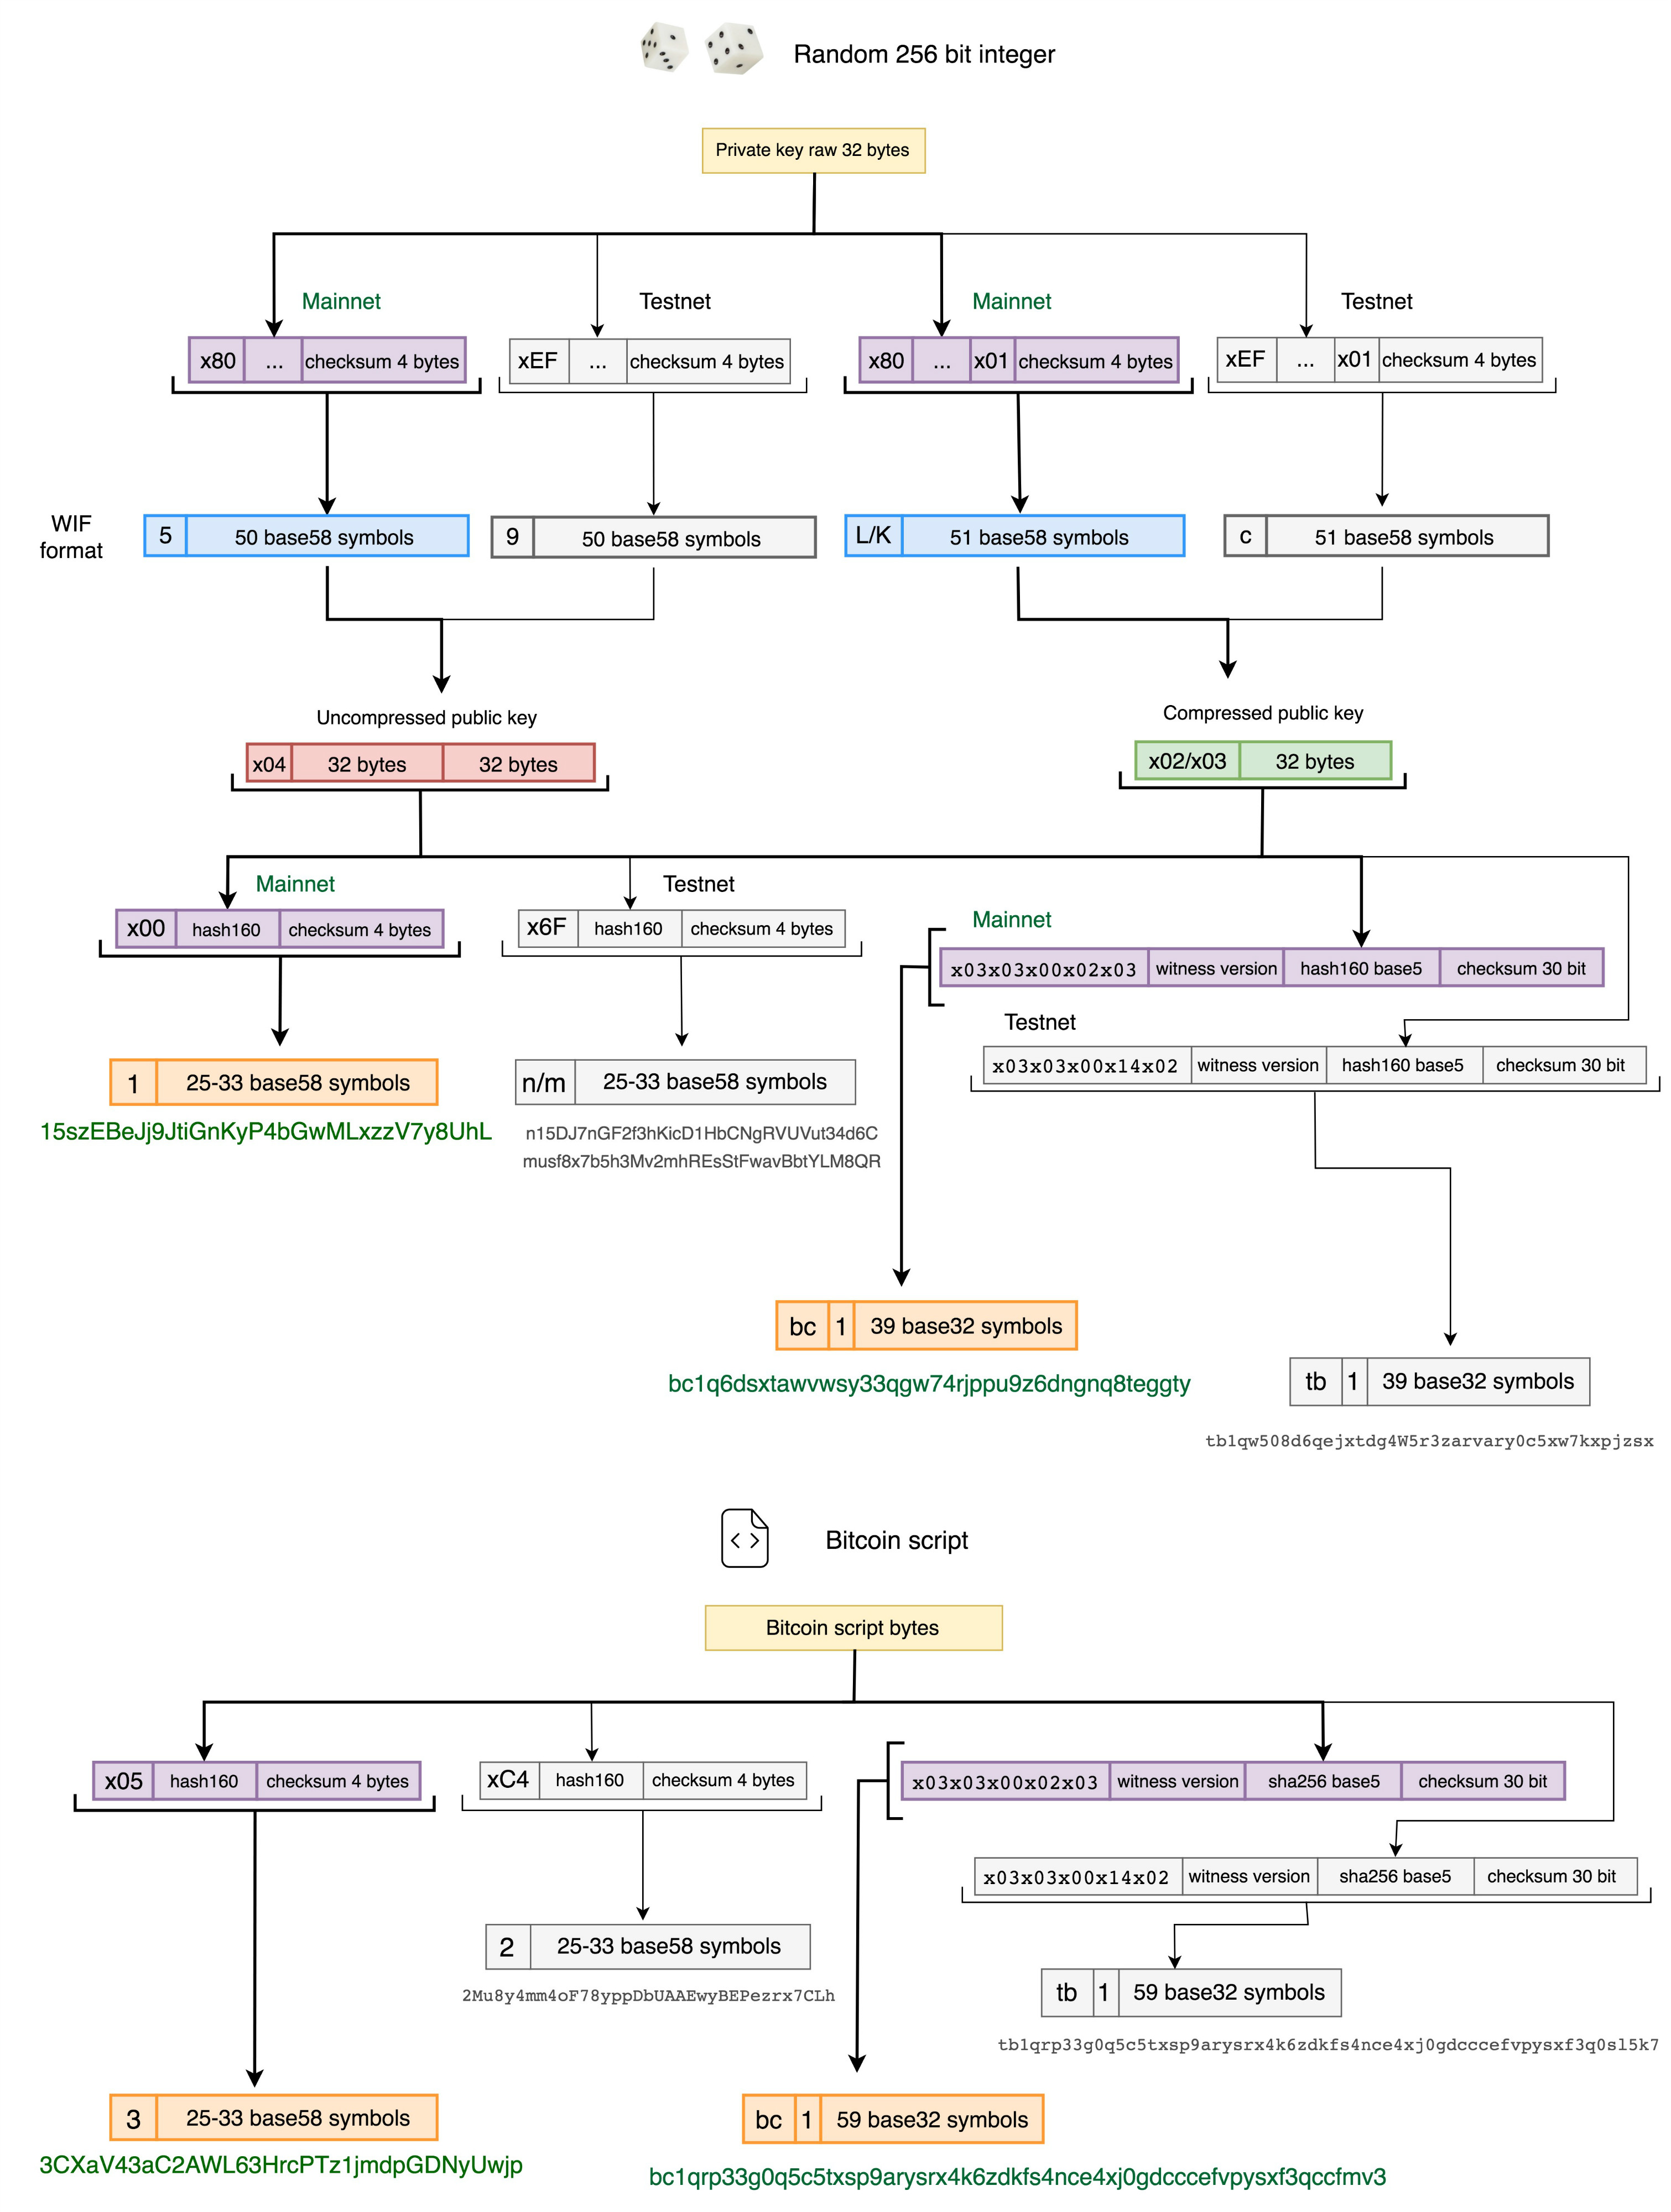
Secure Hash Algorithm (SHA) 
 
and the RACE Integrity Primitives Evaluation Message Digest (RIPEMD)

### p2pkh address

main net network prefix byte : 0x00

testnet network prefix byte : 0x6f 

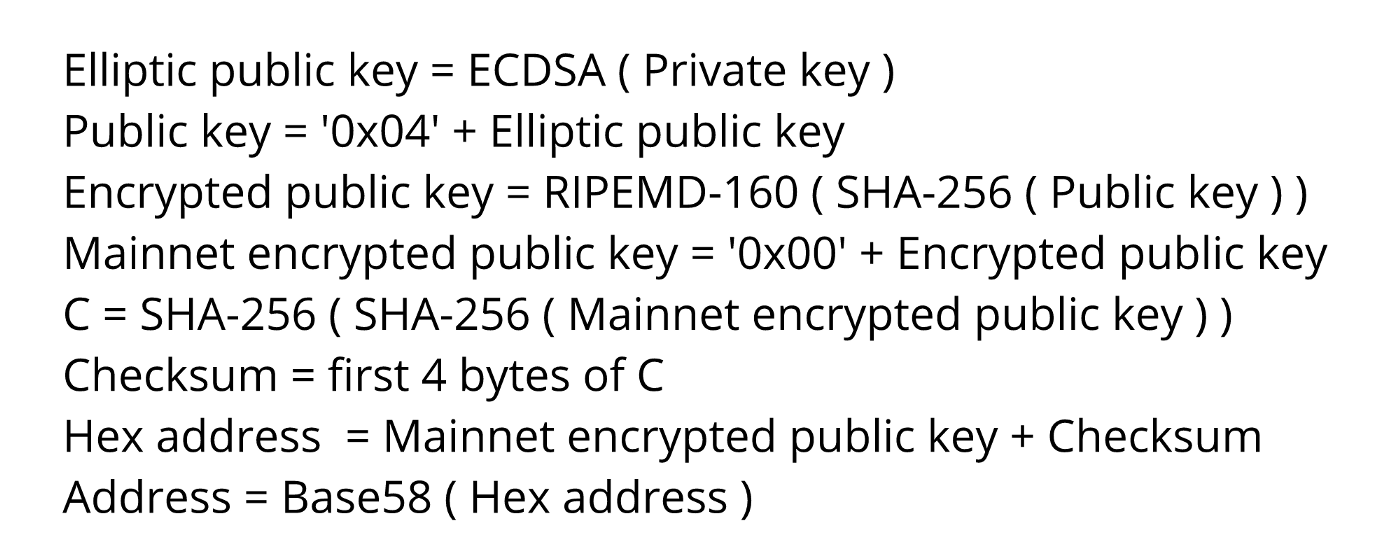

In [166]:
def public_to_address(public_key):
        public_key_bytes = codecs.decode(public_key, 'hex')
        # Run SHA256 for the public key
        sha256_bpk = hashlib.sha256(public_key_bytes)
        sha256_bpk_digest = sha256_bpk.digest()
        # Run ripemd160 for the SHA256
        ripemd160_bpk = hashlib.new('ripemd160')
        ripemd160_bpk.update(sha256_bpk_digest)
        ripemd160_bpk_digest = ripemd160_bpk.digest()
        ripemd160_bpk_hex = codecs.encode(ripemd160_bpk_digest, 'hex')
        # Add network byte
        network_byte = b'6f'
        network_bitcoin_public_key = network_byte + ripemd160_bpk_hex
        network_bitcoin_public_key_bytes = codecs.decode(network_bitcoin_public_key, 'hex')
        # Double SHA256 to get checksum
        sha256_nbpk = hashlib.sha256(network_bitcoin_public_key_bytes)
        sha256_nbpk_digest = sha256_nbpk.digest()
        sha256_2_nbpk = hashlib.sha256(sha256_nbpk_digest)
        sha256_2_nbpk_digest = sha256_2_nbpk.digest()
        sha256_2_hex = codecs.encode(sha256_2_nbpk_digest, 'hex')
        checksum = sha256_2_hex[:8]
        # Concatenate public key and checksum to get the address
        address_hex = (network_bitcoin_public_key + checksum).decode('utf-8')
        wallet = base58(address_hex)
        return wallet
    
def base58(address_hex):
    alphabet = '123456789ABCDEFGHJKLMNPQRSTUVWXYZabcdefghijkmnopqrstuvwxyz'
    b58_string = ''
    # Get the number of leading zeros and convert hex to decimal
    leading_zeros = len(address_hex) - len(address_hex.lstrip('0'))
    # Convert hex to decimal
    address_int = int(address_hex, 16)
    # Append digits to the start of string
    while address_int > 0:
        digit = address_int % 58
        digit_char = alphabet[digit]
        b58_string = digit_char + b58_string
        address_int //= 58
    # Add '1' for each 2 leading zeros
    ones = leading_zeros // 2
    for one in range(ones):
        b58_string = '1' + b58_string
    return b58_string

address = public_to_address(public_key)
print("uncompressed address => ",address)

uncompressed address =>  myDL5u5JoPijL6Zax9btU2LTBSbvH2yfDQ


In [167]:
address_compress = public_to_address(public_key_compressed)
print("compressed address => ",address_compress)

compressed address =>  mhKHBRhnGX3jF5pDZ1bEDg6dHpFmGdKV7Z


## transaction

از یه فاوست تست نت به این آدرس طی دو تا تراکنش بیت کوین فرستادم و با استفاده از رابط برنامه نویسی بلاک سایفر اطلاعات این آدرس رو بعد از دوتا تراکنشی که بهش فرستادم دریافت میکنم  

In [168]:
import requests
response = requests.get('https://api.blockcypher.com/v1/btc/test3/addrs/'+address)
print(response.text)


{
  "address": "myDL5u5JoPijL6Zax9btU2LTBSbvH2yfDQ",
  "total_received": 0,
  "total_sent": 0,
  "balance": 0,
  "unconfirmed_balance": 0,
  "final_balance": 0,
  "n_tx": 0,
  "unconfirmed_n_tx": 0,
  "final_n_tx": 0,
  "tx_url": "https://api.blockcypher.com/v1/btc/test3/txs/"
}


 توی بلوک پایین یه جفت کلید دیگه میسازم و با استفاده از اون جفت کلید آدرس بیتکوینیشون  رو بدست میارم و از حسابی که تو بلوک قبلی بهش فاوست فرستادم به این حساب جدید یه تراکنش میزنم 

In [169]:
binary_format_for_receiver_private_key = secrets.randbits(256)

hex_format_for_receiver_private_key = hex(binary_format_for_receiver_private_key)

receiver_private_key = hex_format_for_receiver_private_key[2:]

print("receiver private key => ",receiver_private_key)

receiver_public_key = private_to_compressed_public(receiver_private_key)

print("\nreceiver compresed public key => ",receiver_public_key)

receiver_address = public_to_address(receiver_public_key)

print("\nreceiver address => ",receiver_address)

receiver private key =>  b48a90c9a6a595bc53e16fd34231534f1a87dcbf9423eb0554701194df257ac5

receiver compresed public key =>  b'0268d407ace57ea8ca5f6c9f430899c491797155f25e866c02cc523b6238b3eee1'

receiver address =>  msxireJBL6Jf8MnRyr2d3igzggCPbqN8mL


### p2pkh transaction :

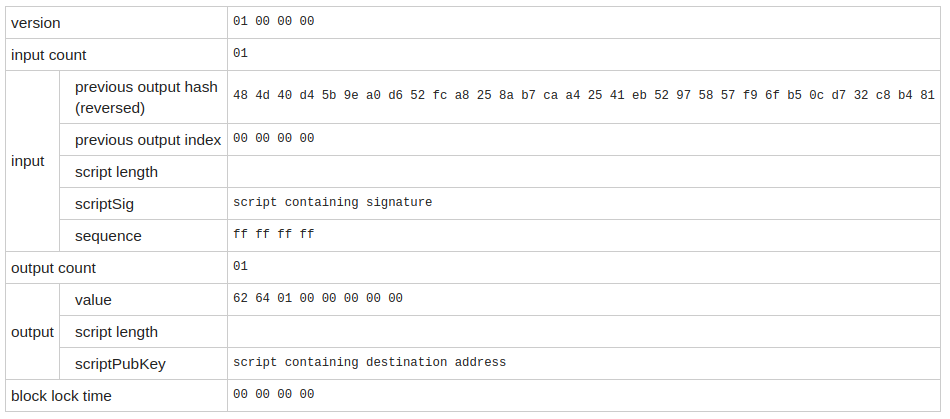

دلیل ریورس بودن هش تراکنش قبلی اینه : بیتکوین داده های خودش رو به روش لیتل ایندین ذخیره میکنه
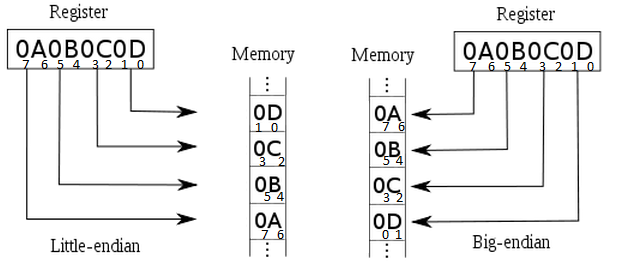

In [170]:
import struct
import base58
import hashlib
import ecdsa
import codecs

sender_addr = address
sender_hashed_pubkey = base58.b58decode_check(sender_addr)[1:].hex()
sender_private_key = private_key


receiver_adr = receiver_address
receiver_hashed_pubkey = base58.b58decode_check(receiver_address)[1:].hex()

prv_txid = "c99887c59605c0f2285abff4913a30ddcba3f23757412a6962ead33a7f248fa0"

# sender : hamid / receiver : amir 
# hamid sends 0.005 BTC to amir and he sends 0.004 BTC back to himself (change) and the remainder of 0.0001 BTC will be given to the miner as a fee

# 1. raw tx
# 2. raw tx and sign that tx using my private key (this is the only way to prove that I'm hamid)
# 3. raw tx and signature in order to create the real tx


class raw_tx:
    version = struct.pack("<L", 1)
    tx_in_count = struct.pack("<B", 1)
    tx_in = {} #TEMP
    tx_out_count = struct.pack("<B", 2)
    tx_out1 = {} #TEMP
    tx_out2 = {} #TEMP
    lock_time = struct.pack("<L", 0)
    
def flip_byte_order(string):
    flipped = "".join(reversed([string[i:i+2] for i in range(0, len(string), 2)]))
    return flipped


rtx = raw_tx()

rtx.tx_in["txouthash"] = codecs.decode(flip_byte_order(prv_txid),'hex')  
rtx.tx_in["tx_out_index"] = struct.pack("<L", 0)
rtx.tx_in["script"] = codecs.decode("76a914"+sender_hashed_pubkey+"88ac",'hex')
rtx.tx_in["scrip_bytes"] = struct.pack("<B", len(rtx.tx_in["script"]))
rtx.tx_in["sequence"] = codecs.decode("ffffffff",'hex')


rtx.tx_out1["value"] = struct.pack("<Q", 50000)
rtx.tx_out1["pk_script"] = codecs.decode("76a914"+receiver_hashed_pubkey+"88ac",'hex')
rtx.tx_out1["pk_script_bytes"] = struct.pack("<B", len(rtx.tx_out1["pk_script"]))

rtx.tx_out2["value"] = struct.pack("<Q", 40000)
rtx.tx_out2["pk_script"]  = codecs.decode("76a914"+sender_hashed_pubkey+"88ac",'hex')
rtx.tx_out2["pk_script_bytes"] = struct.pack("<B", len(rtx.tx_out2["pk_script"]))

raw_tx_string = (

    rtx.version
    + rtx.tx_in_count
    + rtx.tx_in["txouthash"]
    + rtx.tx_in["tx_out_index"]
    + rtx.tx_in["scrip_bytes"]
    + rtx.tx_in["script"]
    + rtx.tx_in["sequence"]
    + rtx.tx_out_count
    + rtx.tx_out1["value"]
    + rtx.tx_out1["pk_script_bytes"]
    + rtx.tx_out1["pk_script"]
    + rtx.tx_out2["value"]
    + rtx.tx_out2["pk_script_bytes"]
    + rtx.tx_out2["pk_script"]
    + rtx.lock_time
    + struct.pack("<L", 1)

    )

hashed_tx_to_sign = hashlib.sha256(hashlib.sha256(raw_tx_string).digest()).digest()
sk = ecdsa.SigningKey.from_string(codecs.decode(sender_private_key,'hex'), curve = ecdsa.SECP256k1)
vk = sk.verifying_key
public_key = (b'04' + vk.to_string()).hex()
signature = sk.sign_digest(hashed_tx_to_sign, sigencode = ecdsa.util.sigencode_der_canonize)


sigscript = (

    signature
    + b"01"
    + struct.pack("<B", len(codecs.decode(public_key,'hex')))
    + codecs.decode(public_key,'hex')

    )


real_tx = (
    rtx.version
    + rtx.tx_in_count
    + rtx.tx_in["txouthash"]
    + rtx.tx_in["tx_out_index"]
    + struct.pack("<B", len(sigscript) + 1)
    + struct.pack("<B", len(signature) + 1)
    + sigscript
    + rtx.tx_in["sequence"]
    + rtx.tx_out_count
    + rtx.tx_out1["value"]
    + rtx.tx_out1["pk_script_bytes"]
    + rtx.tx_out1["pk_script"]
    + rtx.tx_out2["value"]
    + rtx.tx_out2["pk_script_bytes"]
    + rtx.tx_out2["pk_script"]
    + rtx.lock_time
    )

print("raw transaction in hex form => ",real_tx.hex())

hash_1 = hashlib.sha256(real_tx).digest()
hash_2 = hashlib.sha256(hash_1).digest()

print("\ntx hash => ",flip_byte_order(hash_2.hex()),"\n")


raw transaction in hex form =>  0100000001a08f247f3ad3ea62692a415737f2a3cbdd303a91f4bf5a28f2c00596c58798c9000000008d483045022100c773309867d59f49990c294e0a69e59e6b51db214ba005b7eb4805ec3b9e23130220175ac7508f1cb6b9cc431bf509b9a14e809e51028493b83cb088d43c9228c91c30314230345ae44869b778d3795ce9a3ec20cc90faee14acd3b243306709c856b636b6eee8efa8fdea741e1c453e7a3bf2d9a3c405693a5502d1ca9c85e4ae7f18b097fa29ffffffff0250c30000000000001976a91488811b5a3bc8e3d30c8c74a9d64abd352a28464288ac409c0000000000001976a914c21cf76e43552b76f1f1eb0602f93cf86340c73788ac00000000

tx hash =>  f0f7870dc1691c49d71974fe2dc5d4cae802081bd448107b61d7d1ba458bd2f5 



the last step is broadcast raw transaction in suitable network and done .

## resource

### https://developer.bitcoin.org/devguide/
### https://masteringbitcoin.neocities.org/
### https://asecuritysite.com/encryption/bit_keys
### https://bitcointalk.org/
### https://github.com/Destiner/blocksmith/blob/master/blocksmith
### https://docs.python.org/3/library/struct.html
### https://www.youtube.com/watch?v=oDqPn7MVPoY&t=32s